# 繰り返し囚人のジレンマのシミュレーション

対応する動画：[【研究で使うPython】#6 オブジェクト指向で作る繰り返し囚人のジレンマゲームのシミュレーション](https://youtu.be/dRkp-pzTnJ4)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 手続き型

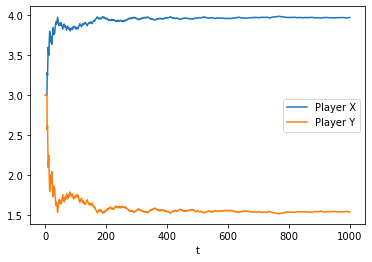

In [5]:
# Jupyterで画像表示
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# グラフに渡すデータを空のリストで作成
x_list = []
y_list = []
t_list = []

# 囚人のジレンマゲームの利得表
payoff = {'T':5, 'R':3, 'P':1, 'S':0}

# 記憶1戦略（前回の自分と相手の行動で今回の自分の行動を決定）
# プレイヤーXの戦略
#p = {'CC':1, 'CD':1, 'DC':1, 'DD':1, '0':1}            # ALLC戦略
#p = {'CC':1, 'CD':0, 'DC':1, 'DD':0, '0':1}            # TFT戦略（前回の相手の戦略を真似する）
p = {'CC':1/2, 'CD':1/2, 'DC':1/2, 'DD':1/2, '0':1/2} # ランダム戦略

# プレイヤーYの戦略
q = {'CC':1, 'CD':1, 'DC':1, 'DD':1, '0':1} # ALLC戦略
#q = {'CC':0, 'CD':0, 'DC':0, 'DD':0, '0':0} # ALLD戦略

# プレイヤーの得点
point_x = 0
point_y = 0

# ゲームの状態
state = '0'  

# 繰り返しゲーム
for i in range(1000):
    action_x = 'C' if np.random.random() < p[state] else 'D'
    action_y = 'C' if np.random.random() < q[state] else 'D'
    
    # ゲームの結果に応じて利得を加算
    if action_x == 'C' and action_y == 'C':
        point_x += payoff['R']; point_y += payoff['R']
    elif action_x == 'C' and action_y == 'D':
        point_x += payoff['S']; point_y += payoff['T']
    elif action_x == 'D' and action_y == 'C':
        point_x += payoff['T']; point_y += payoff['S']
    else:
        point_x += payoff['P']; point_y += payoff['P']
    # ゲームの結果を代入
    state = action_x + action_y
    
    # 時間軸
    t_list.append(i+1)
    # 平均得点をリストに追加
    x_list.append(point_x / (i+1))
    y_list.append(point_y / (i+1))

# 平均得点の変化のグラフ
plt.plot(t_list, x_list, label='Player X')
plt.plot(t_list, y_list, label='Player Y')
plt.legend()
plt.xlabel('t')
plt.show()

## オブジェクト指向

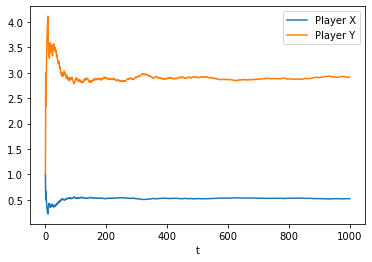

In [3]:
# Jupyterで画像表示
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# グラフに渡すデータを空のリストで作成
x_list = []
y_list = []
t_list = []

# 利得表
payoff = {'T':5, 'R':3, 'P':1, 'S':0}

# プレイヤー（エージェント）の定義
class Agent:
    def __init__(self, strategy):
        self.strategy = strategy # 戦略
        self.action = None      # 行動
        self.point = 0          # 得点
        self.state = '0'        # 状態
        
    def choose_action(self): # 行動選択
        self.action = 'C' if np.random.random() < self.strategy[self.state] else 'D'
    
    def update_state(self, opponent_action):
        self.state = self.action + opponent_action

# プレイヤーXとYの生成，戦略の決定
agent_x = Agent({'CC':1/2, 'CD':1/2, 'DC':1/2, 'DD':1/2, '0':1/2}) # ランダム戦略
agent_y = Agent({'CC':0, 'CD':0, 'DC':0, 'DD':0, '0':0})           # ALLD戦略

# 繰り返しゲーム
for i in range(1000):
    agent_x.choose_action()
    agent_y.choose_action()
    
    # ゲームの結果に応じて利得を加算
    if agent_x.action == 'C' and agent_y.action == 'C':
        agent_x.action.point += payoff['R']; agent_y.point += payoff['R']
    elif agent_x.action == 'C' and agent_y.action == 'D':
        agent_x.point += payoff['S']; agent_y.point += payoff['T']
    elif agent_x.action == 'D' and agent_y.action == 'C':
        agent_x.point += payoff['T']; agent_y.point += payoff['S']
    else:
        agent_x.point += payoff['P']; agent_y.point += payoff['P']
    # ゲームの結果を代入
    agent_x.update_state(agent_y.action)
    agent_y.update_state(agent_x.action)
    
    x_list.append(agent_x.point / (i+1))
    y_list.append(agent_y.point / (i+1))
    t_list.append(i+1)

# 平均得点の変化のグラフ
plt.plot(t_list, x_list, label='Player X')
plt.plot(t_list, y_list, label='Player Y')
plt.legend()
plt.xlabel('t')
plt.show()